In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

In [8]:
df = pd.read_csv("Psychological State Dataset.csv")
df.head()

,ID,Time,HRV (ms),GSR (μS),EEG Power Bands,Blood Pressure (mmHg),Oxygen Saturation (%),Heart Rate (BPM),Ambient Noise (dB),Cognitive Load,Mood State,Psychological State,Respiration Rate (BPM),Skin Temp (°C),Focus Duration (s),Task Type,Age,Gender,Educational Level,Study Major
0,1,2024-01-01 00:00:00,33.039739,1.031806,"[0.7583653347946298, 1.423247998317594, 0.6157...",114/79,98.433312,98,56.863054,Low,Anxious,Stressed,21,34.566484,27,Exam,22,Female,Postgraduate,Engineering
1,2,2024-01-01 00:00:01,49.914651,1.340983,"[0.5520419333516282, 1.858065835142619, 0.3766...",113/86,98.944505,70,45.343430,Low,Neutral,Stressed,21,35.358593,282,Assignment,23,Male,Undergraduate,Arts
2,3,2024-01-01 00:00:02,67.894401,1.006014,"[1.0261365005886114, 1.3504934190994182, 2.308...",124/74,95.990753,91,50.029264,High,Sad,Relaxed,17,34.359495,50,Group Discussion,18,Female,Postgraduate,Arts
3,4,2024-01-01 00:00:03,34.705373,0.849270,"[1.6075723109471591, 1.6619672129812242, 0.344...",120/73,98.173643,95,60.802104,Low,Neutral,Anxious,12,34.802638,223,Exam,28,Female,High School,Engineering
4,5,2024-01-01 00:00:04,52.896549,0.879084,"[1.055003922514022, 0.7643319894343756, 1.0745...",111/80,96.225051,65,40.696384,High,Anxious,Stressed,14,35.869862,201,Group Discussion,24,Female,High School,Engineering


In [9]:
df.drop(["ID","Time"],axis=1,inplace=True)

In [10]:
df.head()

,HRV (ms),GSR (μS),EEG Power Bands,Blood Pressure (mmHg),Oxygen Saturation (%),Heart Rate (BPM),Ambient Noise (dB),Cognitive Load,Mood State,Psychological State,Respiration Rate (BPM),Skin Temp (°C),Focus Duration (s),Task Type,Age,Gender,Educational Level,Study Major
0,33.039739,1.031806,"[0.7583653347946298, 1.423247998317594, 0.6157...",114/79,98.433312,98,56.863054,Low,Anxious,Stressed,21,34.566484,27,Exam,22,Female,Postgraduate,Engineering
1,49.914651,1.340983,"[0.5520419333516282, 1.858065835142619, 0.3766...",113/86,98.944505,70,45.343430,Low,Neutral,Stressed,21,35.358593,282,Assignment,23,Male,Undergraduate,Arts
2,67.894401,1.006014,"[1.0261365005886114, 1.3504934190994182, 2.308...",124/74,95.990753,91,50.029264,High,Sad,Relaxed,17,34.359495,50,Group Discussion,18,Female,Postgraduate,Arts
3,34.705373,0.849270,"[1.6075723109471591, 1.6619672129812242, 0.344...",120/73,98.173643,95,60.802104,Low,Neutral,Anxious,12,34.802638,223,Exam,28,Female,High School,Engineering
4,52.896549,0.879084,"[1.055003922514022, 0.7643319894343756, 1.0745...",111/80,96.225051,65,40.696384,High,Anxious,Stressed,14,35.869862,201,Group Discussion,24,Female,High School,Engineering


In [18]:
df["EEG Power Bands"][0]

'[0.7583653347946298, 1.423247998317594, 0.6157696670741735]'

In [19]:
df["EEG Power Bands"][0].split(", ")

['[0.7583653347946298', '1.423247998317594', '0.6157696670741735]']

In [20]:
df["EEG Power Bands"][0].split(", ")[0]

'[0.7583653347946298'

In [21]:
df["EEG Power Bands"][0].split(", ")[1]

'1.423247998317594'

In [22]:
df["EEG Power Bands"][0].split(", ")[2]

'0.6157696670741735]'

In [23]:
df["EEG Power Bands"][0].split(", ")[0][1:]

'0.7583653347946298'

In [16]:
float(df["EEG Power Bands"][0].split(", ")[0][1:])

0.7583653347946298

In [24]:
df["delta"]=df["EEG Power Bands"].map(lambda x : float(x.split(", ")[0][1:]))

In [26]:
df["alpha"]=df["EEG Power Bands"].map(lambda x: float(x.split(", ")[1]))

In [27]:
df["beta"]=df["EEG Power Bands"].map(lambda x : float(x.split(", ")[2][:-1]))

In [28]:
df.head()

,HRV (ms),GSR (μS),EEG Power Bands,Blood Pressure (mmHg),Oxygen Saturation (%),Heart Rate (BPM),Ambient Noise (dB),Cognitive Load,Mood State,Psychological State,Respiration Rate (BPM),Skin Temp (°C),Focus Duration (s),Task Type,Age,Gender,Educational Level,Study Major,delta,alpha,beta
0,33.039739,1.031806,"[0.7583653347946298, 1.423247998317594, 0.6157...",114/79,98.433312,98,56.863054,Low,Anxious,Stressed,21,34.566484,27,Exam,22,Female,Postgraduate,Engineering,0.758365,1.423248,0.615770
1,49.914651,1.340983,"[0.5520419333516282, 1.858065835142619, 0.3766...",113/86,98.944505,70,45.343430,Low,Neutral,Stressed,21,35.358593,282,Assignment,23,Male,Undergraduate,Arts,0.552042,1.858066,0.376605
2,67.894401,1.006014,"[1.0261365005886114, 1.3504934190994182, 2.308...",124/74,95.990753,91,50.029264,High,Sad,Relaxed,17,34.359495,50,Group Discussion,18,Female,Postgraduate,Arts,1.026137,1.350493,2.308769
3,34.705373,0.849270,"[1.6075723109471591, 1.6619672129812242, 0.344...",120/73,98.173643,95,60.802104,Low,Neutral,Anxious,12,34.802638,223,Exam,28,Female,High School,Engineering,1.607572,1.661967,0.344134
4,52.896549,0.879084,"[1.055003922514022, 0.7643319894343756, 1.0745...",111/80,96.225051,65,40.696384,High,Anxious,Stressed,14,35.869862,201,Group Discussion,24,Female,High School,Engineering,1.055004,0.764332,1.074537


In [37]:
df["Systolic"]=df["Blood Pressure (mmHg)"].map(lambda x : int(x.split("/")[0]))

In [38]:
df["Diastolic"]=df["Blood Pressure (mmHg)"].map(lambda x : int(x.split("/")[1]))

In [39]:
df.head()

,HRV (ms),GSR (μS),EEG Power Bands,Blood Pressure (mmHg),Oxygen Saturation (%),Heart Rate (BPM),Ambient Noise (dB),Cognitive Load,Mood State,Psychological State,Respiration Rate (BPM),Skin Temp (°C),Focus Duration (s),Task Type,Age,Gender,Educational Level,Study Major,delta,alpha,beta,Diastolic,Systolic
0,33.039739,1.031806,"[0.7583653347946298, 1.423247998317594, 0.6157...",114/79,98.433312,98,56.863054,Low,Anxious,Stressed,21,34.566484,27,Exam,22,Female,Postgraduate,Engineering,0.758365,1.423248,0.615770,79,114
1,49.914651,1.340983,"[0.5520419333516282, 1.858065835142619, 0.3766...",113/86,98.944505,70,45.343430,Low,Neutral,Stressed,21,35.358593,282,Assignment,23,Male,Undergraduate,Arts,0.552042,1.858066,0.376605,86,113
2,67.894401,1.006014,"[1.0261365005886114, 1.3504934190994182, 2.308...",124/74,95.990753,91,50.029264,High,Sad,Relaxed,17,34.359495,50,Group Discussion,18,Female,Postgraduate,Arts,1.026137,1.350493,2.308769,74,124
3,34.705373,0.849270,"[1.6075723109471591, 1.6619672129812242, 0.344...",120/73,98.173643,95,60.802104,Low,Neutral,Anxious,12,34.802638,223,Exam,28,Female,High School,Engineering,1.607572,1.661967,0.344134,73,120
4,52.896549,0.879084,"[1.055003922514022, 0.7643319894343756, 1.0745...",111/80,96.225051,65,40.696384,High,Anxious,Stressed,14,35.869862,201,Group Discussion,24,Female,High School,Engineering,1.055004,0.764332,1.074537,80,111


In [40]:
df.drop(["EEG Power Bands","Blood Pressure (mmHg)"],axis=1,inplace=True)
df.head()

,HRV (ms),GSR (μS),Oxygen Saturation (%),Heart Rate (BPM),Ambient Noise (dB),Cognitive Load,Mood State,Psychological State,Respiration Rate (BPM),Skin Temp (°C),Focus Duration (s),Task Type,Age,Gender,Educational Level,Study Major,delta,alpha,beta,Diastolic,Systolic
0,33.039739,1.031806,98.433312,98,56.863054,Low,Anxious,Stressed,21,34.566484,27,Exam,22,Female,Postgraduate,Engineering,0.758365,1.423248,0.615770,79,114
1,49.914651,1.340983,98.944505,70,45.343430,Low,Neutral,Stressed,21,35.358593,282,Assignment,23,Male,Undergraduate,Arts,0.552042,1.858066,0.376605,86,113
2,67.894401,1.006014,95.990753,91,50.029264,High,Sad,Relaxed,17,34.359495,50,Group Discussion,18,Female,Postgraduate,Arts,1.026137,1.350493,2.308769,74,124
3,34.705373,0.849270,98.173643,95,60.802104,Low,Neutral,Anxious,12,34.802638,223,Exam,28,Female,High School,Engineering,1.607572,1.661967,0.344134,73,120
4,52.896549,0.879084,96.225051,65,40.696384,High,Anxious,Stressed,14,35.869862,201,Group Discussion,24,Female,High School,Engineering,1.055004,0.764332,1.074537,80,111


In [41]:
df.describe()

,HRV (ms),GSR (μS),Oxygen Saturation (%),Heart Rate (BPM),Ambient Noise (dB),Respiration Rate (BPM),Skin Temp (°C),Focus Duration (s),Age,delta,alpha,beta,Diastolic,Systolic
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.920454,0.995749,97.419577,78.829000,49.825774,18.061000,34.988254,154.499000,23.477000,1.358240,1.350936,1.350890,79.382000,119.376000
std,9.863658,0.285758,1.442865,11.818097,11.745028,3.719558,0.567596,84.098922,3.420698,0.670225,0.651778,0.679453,5.788401,5.854648
min,17.405557,0.501567,95.001452,60.000000,30.017619,12.000000,34.001039,10.000000,18.000000,0.200521,0.203014,0.202257,70.000000,110.000000
25%,43.019097,0.736509,96.154447,68.000000,39.462492,15.000000,34.512701,83.750000,21.000000,0.787116,0.802376,0.768054,75.000000,114.000000
50%,49.982476,0.999965,97.395945,78.000000,50.012015,18.000000,34.974199,156.000000,23.000000,1.375709,1.336313,1.336181,79.000000,119.000000
75%,56.538365,1.239964,98.643364,89.000000,59.690683,21.000000,35.459442,227.000000,27.000000,1.909444,1.929745,1.950509,84.000000,125.000000
max,78.841149,1.499563,99.997277,99.000000,69.902683,24.000000,35.997964,299.000000,29.000000,2.499933,2.494462,2.499233,89.000000,129.000000


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   HRV (ms)                1000 non-null   float64
 1   GSR (μS)                1000 non-null   float64
 2   Oxygen Saturation (%)   1000 non-null   float64
 3   Heart Rate (BPM)        1000 non-null   int64  
 4   Ambient Noise (dB)      1000 non-null   float64
 5   Cognitive Load          1000 non-null   object 
 6   Mood State              1000 non-null   object 
 7   Psychological State     1000 non-null   object 
 8   Respiration Rate (BPM)  1000 non-null   int64  
 9   Skin Temp (°C)          1000 non-null   float64
 10  Focus Duration (s)      1000 non-null   int64  
 11  Task Type               1000 non-null   object 
 12  Age                     1000 non-null   int64  
 13  Gender                  1000 non-null   object 
 14  Educational Level       1000 non-null   o

In [45]:
numerical_cols = [i for i in df.columns if not str(df[i].dtype).startswith("o")]

In [46]:
numerical_cols

['HRV (ms)',
 'GSR (μS)',
 'Oxygen Saturation (%)',
 'Heart Rate (BPM)',
 'Ambient Noise (dB)',
 'Respiration Rate (BPM)',
 'Skin Temp (°C)',
 'Focus Duration (s)',
 'Age',
 'delta',
 'alpha',
 'beta',
 'Diastolic',
 'Systolic']

In [47]:
categorical_cols = [i for i in df.columns if str(df[i].dtype).startswith("o")]

In [48]:
categorical_cols

['Cognitive Load',
 'Mood State',
 'Psychological State',
 'Task Type',
 'Gender',
 'Educational Level',
 'Study Major']

In [49]:
for i in  categorical_cols:
    print(df[i].value_counts())
    print("="*30)

Cognitive Load
High        351
Low         344
Moderate    305
Name: count, dtype: int64
Mood State
Happy      268
Sad        254
Neutral    240
Anxious    238
Name: count, dtype: int64
Psychological State
Stressed    263
Focused     249
Relaxed     247
Anxious     241
Name: count, dtype: int64
Task Type
Group Discussion    259
Exam                254
Assignment          245
Lecture             242
Name: count, dtype: int64
Gender
Other     343
Female    330
Male      327
Name: count, dtype: int64
Educational Level
Undergraduate    338
High School      335
Postgraduate     327
Name: count, dtype: int64
Study Major
Arts           337
Science        337
Engineering    326
Name: count, dtype: int64


In [51]:
ohe = OneHotEncoder(drop="first",handle_unknown="ignore")

In [55]:
encoded = ohe.fit_transform(df[['Cognitive Load',
 'Mood State',
 'Task Type',
 'Gender',
 'Educational Level',
 'Study Major']])

In [56]:
encoded.toarray()

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.]])

In [57]:
encoded_df = pd.DataFrame(encoded.toarray(),columns = ohe.get_feature_names_out())

In [58]:
encoded_df

,Cognitive Load_Low,Cognitive Load_Moderate,Mood State_Happy,Mood State_Neutral,Mood State_Sad,Task Type_Exam,Task Type_Group Discussion,Task Type_Lecture,Gender_Male,Gender_Other,Educational Level_Postgraduate,Educational Level_Undergraduate,Study Major_Engineering,Study Major_Science
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
996,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
997,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
998,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [61]:
new_df = df.drop(['Cognitive Load',
 'Mood State',"Psychological State",
 'Task Type',
 'Gender',
 'Educational Level',
 'Study Major'],axis=1)

In [62]:
new_df

,HRV (ms),GSR (μS),Oxygen Saturation (%),Heart Rate (BPM),Ambient Noise (dB),Respiration Rate (BPM),Skin Temp (°C),Focus Duration (s),Age,delta,alpha,beta,Diastolic,Systolic
0,33.039739,1.031806,98.433312,98,56.863054,21,34.566484,27,22,0.758365,1.423248,0.615770,79,114
1,49.914651,1.340983,98.944505,70,45.343430,21,35.358593,282,23,0.552042,1.858066,0.376605,86,113
2,67.894401,1.006014,95.990753,91,50.029264,17,34.359495,50,18,1.026137,1.350493,2.308769,74,124
3,34.705373,0.849270,98.173643,95,60.802104,12,34.802638,223,28,1.607572,1.661967,0.344134,73,120
4,52.896549,0.879084,96.225051,65,40.696384,14,35.869862,201,24,1.055004,0.764332,1.074537,80,111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,73.056208,0.961572,96.380705,66,39.395938,22,34.710484,99,24,1.417098,0.558137,2.057760,72,120
996,60.489220,1.167583,99.885334,75,31.074585,12,34.636933,191,19,0.436657,0.602476,1.601388,86,110
997,60.795800,0.996753,99.851796,82,53.373199,23,35.572915,103,28,2.446697,0.403743,0.437608,83,127
998,42.321587,0.681139,96.829325,84,32.758992,19,35.295968,241,26,2.232453,0.658990,1.095468,73,126


In [63]:
new_df = pd.concat([new_df,encoded_df],axis=1)

In [64]:
new_df

,HRV (ms),GSR (μS),Oxygen Saturation (%),Heart Rate (BPM),Ambient Noise (dB),Respiration Rate (BPM),Skin Temp (°C),Focus Duration (s),Age,delta,alpha,beta,Diastolic,Systolic,Cognitive Load_Low,Cognitive Load_Moderate,Mood State_Happy,Mood State_Neutral,Mood State_Sad,Task Type_Exam,Task Type_Group Discussion,Task Type_Lecture,Gender_Male,Gender_Other,Educational Level_Postgraduate,Educational Level_Undergraduate,Study Major_Engineering,Study Major_Science
0,33.039739,1.031806,98.433312,98,56.863054,21,34.566484,27,22,0.758365,1.423248,0.615770,79,114,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,49.914651,1.340983,98.944505,70,45.343430,21,35.358593,282,23,0.552042,1.858066,0.376605,86,113,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,67.894401,1.006014,95.990753,91,50.029264,17,34.359495,50,18,1.026137,1.350493,2.308769,74,124,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,34.705373,0.849270,98.173643,95,60.802104,12,34.802638,223,28,1.607572,1.661967,0.344134,73,120,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,52.896549,0.879084,96.225051,65,40.696384,14,35.869862,201,24,1.055004,0.764332,1.074537,80,111,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,73.056208,0.961572,96.380705,66,39.395938,22,34.710484,99,24,1.417098,0.558137,2.057760,72,120,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
996,60.489220,1.167583,99.885334,75,31.074585,12,34.636933,191,19,0.436657,0.602476,1.601388,86,110,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
997,60.795800,0.996753,99.851796,82,53.373199,23,35.572915,103,28,2.446697,0.403743,0.437608,83,127,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
998,42.321587,0.681139,96.829325,84,32.758992,19,35.295968,241,26,2.232453,0.658990,1.095468,73,126,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [65]:
le = LabelEncoder()

LabelEncoder() is a class in the sklearn.preprocessing module of the Python library scikit-learn. It is used to encode target labels (categorical variables) into numeric form, converting them into integers ranging from 0 to n−1, where n is the number of unique classes. This is especially useful when working with machine learning models, as many models cannot directly process categorical data.

> Use Case
* LabelEncoder is commonly used for:
  * Encoding target variables in supervised learning.
  * Preparing categorical data for use in machine learning algorithms.

> Limitations
* It is suitable for labels and not for feature data. For feature encoding, OneHotEncoder or other techniques are recommended.
* Ordinal relationships are implied when using LabelEncoder, which might not be appropriate for non-ordinal data.

In [66]:
new_df["target"] = le.fit_transform(df["Psychological State"])

In [68]:
new_df.head()

,HRV (ms),GSR (μS),Oxygen Saturation (%),Heart Rate (BPM),Ambient Noise (dB),Respiration Rate (BPM),Skin Temp (°C),Focus Duration (s),Age,delta,alpha,beta,Diastolic,Systolic,Cognitive Load_Low,Cognitive Load_Moderate,Mood State_Happy,Mood State_Neutral,Mood State_Sad,Task Type_Exam,Task Type_Group Discussion,Task Type_Lecture,Gender_Male,Gender_Other,Educational Level_Postgraduate,Educational Level_Undergraduate,Study Major_Engineering,Study Major_Science,target
0,33.039739,1.031806,98.433312,98,56.863054,21,34.566484,27,22,0.758365,1.423248,0.615770,79,114,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3
1,49.914651,1.340983,98.944505,70,45.343430,21,35.358593,282,23,0.552042,1.858066,0.376605,86,113,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3
2,67.894401,1.006014,95.990753,91,50.029264,17,34.359495,50,18,1.026137,1.350493,2.308769,74,124,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
3,34.705373,0.849270,98.173643,95,60.802104,12,34.802638,223,28,1.607572,1.661967,0.344134,73,120,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,52.896549,0.879084,96.225051,65,40.696384,14,35.869862,201,24,1.055004,0.764332,1.074537,80,111,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3


In [69]:
scaler = StandardScaler()

In [70]:
new_df[numerical_cols]=scaler.fit_transform(df[numerical_cols])

In [71]:
new_df.head()

,HRV (ms),GSR (μS),Oxygen Saturation (%),Heart Rate (BPM),Ambient Noise (dB),Respiration Rate (BPM),Skin Temp (°C),Focus Duration (s),Age,delta,alpha,beta,Diastolic,Systolic,Cognitive Load_Low,Cognitive Load_Moderate,Mood State_Happy,Mood State_Neutral,Mood State_Sad,Task Type_Exam,Task Type_Group Discussion,Task Type_Lecture,Gender_Male,Gender_Other,Educational Level_Postgraduate,Educational Level_Undergraduate,Study Major_Engineering,Study Major_Science,target
0,-1.712261,0.126242,0.702936,1.622985,0.599471,0.790543,-0.743453,-1.516818,-0.431999,-0.895483,0.111002,-1.082471,-0.066027,-0.918704,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3
1,-0.000589,1.208738,1.057404,-0.747448,-0.381829,0.790543,0.652797,1.516842,-0.139515,-1.203479,0.778461,-1.434643,1.143893,-1.089594,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3
2,1.823151,0.035938,-0.990765,1.030377,0.017334,-0.285392,-1.108311,-1.243194,-1.601937,-0.495759,-0.000679,1.410486,-0.930256,0.790195,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
3,-1.543311,-0.512857,0.522879,1.369010,0.935019,-1.630310,-0.327185,0.814936,1.322907,0.372199,0.477443,-1.482457,-1.103102,0.106635,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,0.301874,-0.408469,-0.828300,-1.170740,-0.777687,-1.092343,1.554008,0.553209,0.152969,-0.452666,-0.900456,-0.406933,0.106819,-1.431374,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3


In [75]:
new_df.corr()["target"]

HRV (ms)                          -0.052291
GSR (μS)                           0.004159
Oxygen Saturation (%)             -0.036652
Heart Rate (BPM)                   0.024614
Ambient Noise (dB)                 0.043031
Respiration Rate (BPM)            -0.035136
Skin Temp (°C)                     0.014709
Focus Duration (s)                 0.008749
Age                               -0.015330
delta                              0.013722
alpha                             -0.015165
beta                               0.024326
Diastolic                          0.027253
Systolic                           0.019505
Cognitive Load_Low                -0.028179
Cognitive Load_Moderate            0.028556
Mood State_Happy                  -0.003174
Mood State_Neutral                 0.009022
Mood State_Sad                     0.020228
Task Type_Exam                     0.005885
Task Type_Group Discussion         0.010612
Task Type_Lecture                 -0.034870
Gender_Male                     

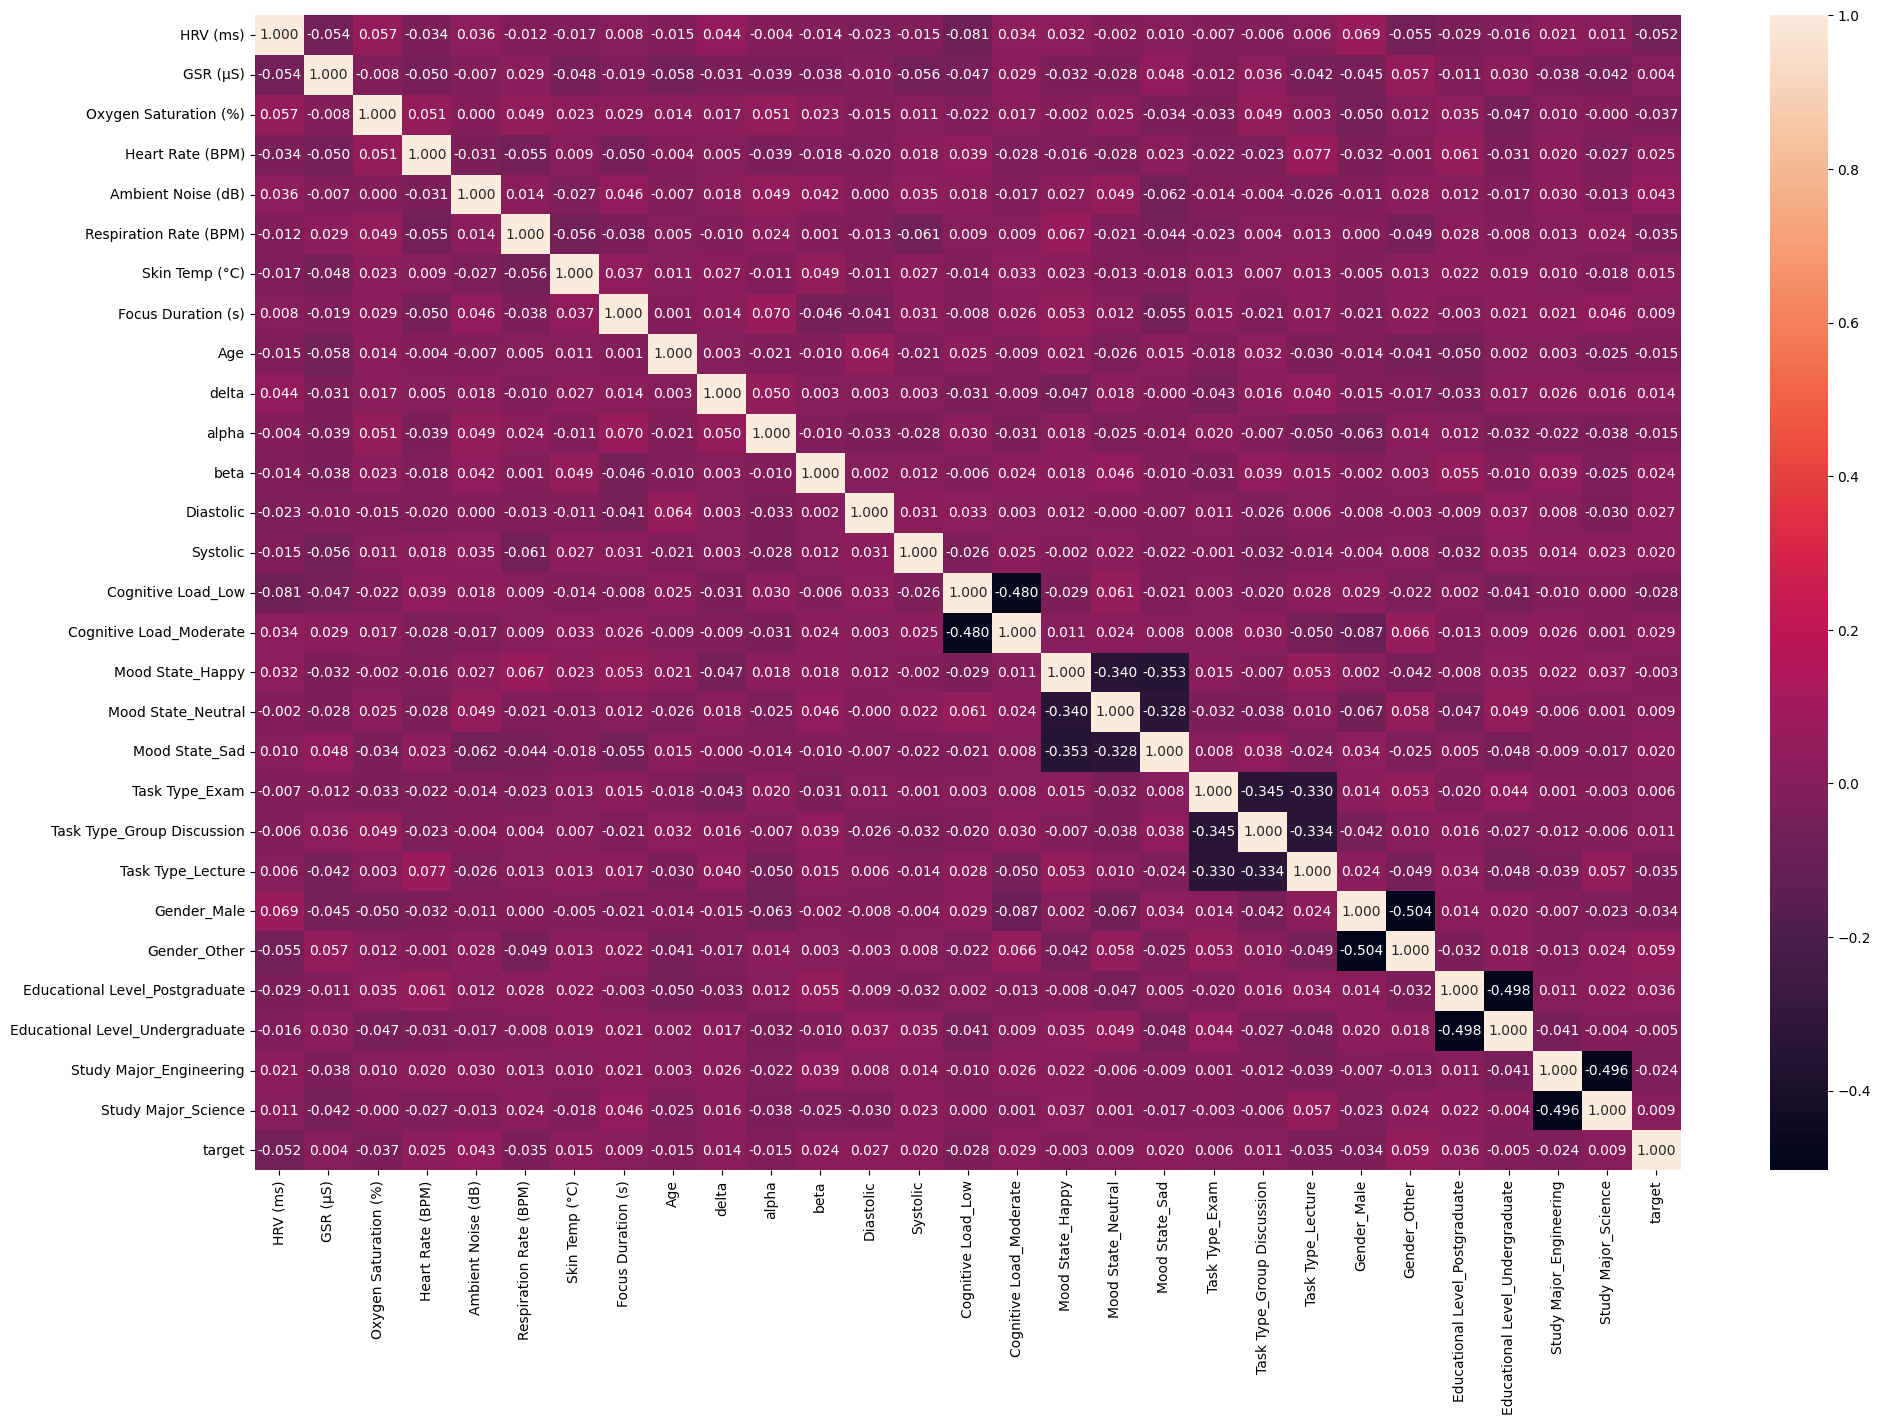

In [77]:
plt.figure(figsize=(23,15))
sns.heatmap(new_df.corr(),annot=True,fmt=".3f")
plt.show()

In [78]:
x = new_df.drop("target",axis=1)
y = new_df["target"]

In [86]:
x_tr, x_te, y_tr, y_te = train_test_split(x,y,train_size=0.75,random_state=34)

In [87]:
model = RandomForestClassifier(n_estimators=200,max_depth=8)

The RandomForestClassifier is a machine learning algorithm from the sklearn.ensemble module in scikit-learn. It is a popular ensemble learning method based on decision trees. Here's what the parameters you mentioned mean:

> Parameters:
* n_estimators=200:

    * Specifies the number of decision trees in the forest.
    * Increasing the number of estimators can improve model performance (up to a point) by reducing variance, but it also increases computational cost.
    * Default: 100 (if not specified).

* max_depth=8:

    * Defines the maximum depth of each decision tree in the forest.
    * Controls the complexity of the trees and helps prevent overfitting.
    * A smaller value leads to simpler trees and faster training but might underfit the data.

> Key Notes:
* Benefits:

    * Handles both classification and regression tasks.
    * Robust to overfitting for large datasets.
    * Can handle missing values and categorical data (if preprocessed appropriately).
* Limitations:

    * Computationally expensive for a large number of trees or features.
    * May require tuning of hyperparameters like n_estimators, max_depth, min_samples_split, etc., to achieve optimal performance.
* Commonly Used Additional Parameters:

    * min_samples_split: Minimum number of samples required to split an internal node.
    * min_samples_leaf: Minimum number of samples required to be at a leaf node.
    * max_features: Number of features to consider for splitting at each node.

In [88]:
model.fit(x_tr, y_tr)

RandomForestClassifier(max_depth=8, n_estimators=200)

In [89]:
model.score(x_tr, y_tr)

0.9973333333333333

In [90]:
y_pr = model.predict(x_te)
y_pr

array([2, 2, 2, 3, 1, 2, 0, 3, 3, 1, 1, 3, 0, 1, 0, 1, 3, 0, 3, 2, 3, 3,
       0, 3, 1, 2, 3, 0, 0, 2, 0, 2, 0, 2, 0, 2, 1, 1, 2, 1, 1, 2, 0, 3,
       2, 0, 0, 1, 3, 2, 2, 1, 0, 1, 0, 0, 1, 2, 3, 0, 3, 0, 3, 3, 0, 3,
       0, 2, 0, 3, 1, 2, 1, 2, 1, 2, 2, 2, 3, 3, 3, 1, 1, 0, 0, 3, 2, 1,
       2, 3, 2, 3, 2, 3, 3, 1, 3, 3, 2, 0, 3, 2, 1, 1, 1, 1, 2, 3, 3, 2,
       3, 0, 0, 1, 3, 0, 3, 3, 2, 1, 1, 3, 0, 3, 0, 1, 1, 3, 3, 1, 1, 3,
       0, 1, 2, 3, 2, 2, 1, 0, 3, 0, 0, 2, 0, 2, 0, 3, 0, 1, 3, 1, 2, 0,
       2, 1, 3, 1, 2, 2, 0, 2, 0, 3, 3, 2, 3, 0, 1, 3, 3, 0, 2, 0, 2, 2,
       0, 1, 1, 0, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 3, 3, 0, 3, 1, 0, 0, 3,
       0, 1, 1, 1, 1, 2, 3, 2, 3, 2, 1, 1, 1, 0, 2, 2, 1, 2, 1, 3, 0, 2,
       1, 0, 3, 2, 2, 1, 1, 0, 1, 2, 2, 0, 3, 1, 0, 3, 1, 0, 1, 2, 1, 2,
       3, 0, 0, 3, 0, 3, 1, 0])

In [91]:
accuracy_score(y_te, y_pr)

0.24